In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3
import json
import requests
from pandas.io.json import json_normalize
from datetime import datetime
import yfinance as yf

#Install Dependencies
import tensorflow as tf
from tensorflow import keras
import torch
import re
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from keras.preprocessing.text import Tokenizer


from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


In [4]:
#pip install transformers

In [5]:
#pip install yfinance

In [6]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_11-12.2022.csv")


In [125]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_dec_jan.csv")

                                                                                    Collect data from yfinance 

In [55]:
sp500=yf.Ticker("^GSPC")

In [118]:
GTHX=yf.Ticker("GTHX")

In [124]:
GTHX.get_news()

[{'uuid': '611cce7d-65ab-3260-9159-dfe7f5e36686',
  'title': 'G1 Therapeutics stock plummets 50% after trial cut short for cancer drug',
  'publisher': 'American City Business Journals',
  'link': 'https://finance.yahoo.com/m/611cce7d-65ab-3260-9159-dfe7f5e36686/g1-therapeutics-stock.html',
  'providerPublishTime': 1676313230,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/mAxspbl72gA2xOf0x15Bdw--~B/aD05NTk7dz0xNDQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/bizjournals.com/e686adb5478c01814f64a8109aaf55e0',
     'width': 1440,
     'height': 959,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/nYWrYkXhQT8MHxWdHILtbA--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/bizjournals.com/e686adb5478c01814f64a8109aaf55e0',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['GTHX']},
 {'uuid': '235206f9-e159-34f2-97cf-b91fbc7542a2',
  'title': 'G1 

In [171]:
index_price=sp500.history(start="2022-11-01", end="2023-01-12",)

In [172]:
index_price.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)

In [173]:
index_price=index_price.tz_localize(None)

In [174]:
index_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    49 non-null     float64
 1   High    49 non-null     float64
 2   Low     49 non-null     float64
 3   Close   49 non-null     float64
 4   Volume  49 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


                                                                                    DATA WRANGLING & CLEANING 

In [7]:
#index=pd.read_csv

In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   title         10000 non-null  object
 2   url           10000 non-null  object
 3   description   10000 non-null  object
 4   source        10000 non-null  object
 5   tickers       10000 non-null  object
 6   tags          10000 non-null  object
 7   published_at  10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [9]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [127]:
news_2.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [10]:
print(news["description"].head(3))

0    Shares of Abiomed Inc. undefined rocketed 48.8...
1    Shares of Abiomed Inc. undefined rocketed 48.8...
2    Given their link to other risk-sensitive asset...
Name: description, dtype: object


In [11]:
news.tail(1)

,title,url,description,source,tickers,tags,published_at
9999,"Morgan Stanley stock falls Wednesday, underper...",https://www.marketwatch.com/story/morgan-stanl...,Shares of Morgan Stanley slid 2.38% to $90.50 ...,marketwatch.com,"['barl', 'djia', 'jpm', 'ms', 'msk', 'mwg', 'm...","['Djia', 'Dwitd', 'ETF', 'Financial Services',...",2022-12-14T22:11:00+00:00


In [12]:
news.isna().sum()

title           0
url             0
description     0
source          0
tickers         0
tags            0
published_at    0
dtype: int64

<AxesSubplot:xlabel='source', ylabel='count'>

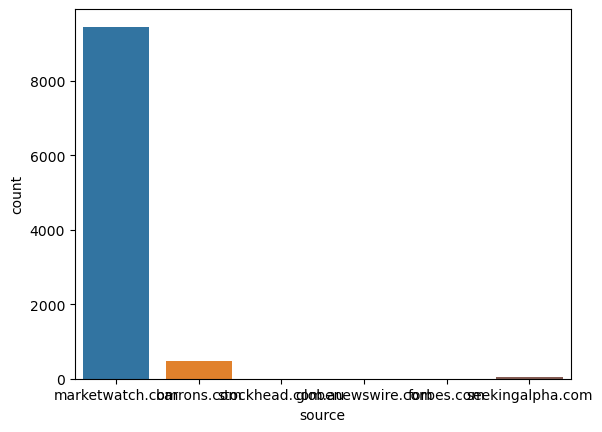

In [13]:
sns.countplot(data=news,x="source")

                                                                            FinBERT test

Test

In [14]:
tokens=tokenizer.encode("Morgan Stanley stock falls Wednesday",return_tensors="pt")
tokens

tensor([[ 101, 5253, 6156, 4518, 4212, 9317,  102]])

In [15]:
result=model(tokens)
result

SequenceClassifierOutput(loss=None, logits=tensor([[-1.7393,  2.3077,  0.1124]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [16]:
result.logits

tensor([[-1.7393,  2.3077,  0.1124]], grad_fn=<AddmmBackward0>)

In [17]:

int(torch.argmax(result.logits))+1


2

                                                Apllying Model on tittles

In [130]:
def sentiment_score(text):
    tokens=tokenizer.encode(text,return_tensors="pt")
    result=model(tokens)
    return int(torch.argmax(result.logits))+1




In [19]:

#news["sentiment_title"]=news["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [131]:

news_2["sentiment_title"]=news_2["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [133]:
news_2.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_2.csv")

In [20]:
#news["sentiment_description"]=news["description"].apply(lambda x:sentiment_score(x[:512]))

In [146]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [147]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_2.csv")

In [148]:
news=news.append(news_2)

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_57026/2509051536.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news=news.append(news_2)


In [149]:
news["date"]=pd.to_datetime(news["published_at"]).dt.date


In [ ]:
#news["date"]=news["date"].da

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  20000 non-null  object 
 1   url                    20000 non-null  object 
 2   description            20000 non-null  object 
 3   source                 20000 non-null  object 
 4   tickers                20000 non-null  object 
 5   tags                   20000 non-null  object 
 6   published_at           20000 non-null  object 
 7   sentiment_title        20000 non-null  int64  
 8   sentiment_description  10000 non-null  float64
 9   date                   20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.7+ MB


In [153]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [162]:
news.reset_index(inplace=True)

In [164]:
news.drop(labels="index",axis=1,inplace=True)

<AxesSubplot:xlabel='sentiment_description', ylabel='count'>

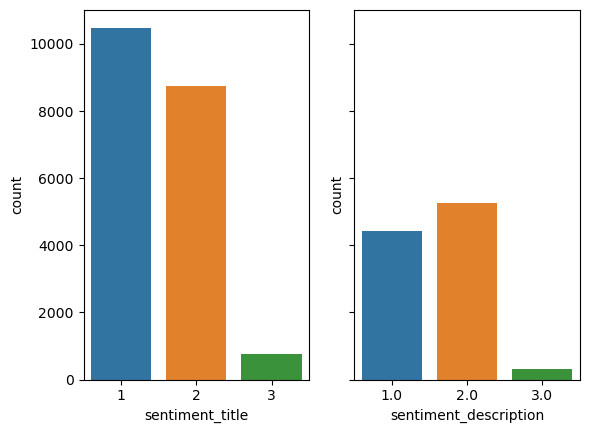

In [166]:
n_subplots=2
sharey=True
fig,axs=plt.subplots(1,n_subplots,sharey=sharey)
sns.countplot(data=news,x="sentiment_title",ax=axs[0])
sns.countplot(data=news,x="sentiment_description",ax=axs[1])



In [25]:
#news.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [167]:
grouped_news=news.loc[:,["date","sentiment_title","sentiment_description"]].groupby(by="date",axis=0,dropna=True,as_index=True).mean()

In [168]:
grouped_news.head()

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000


<AxesSubplot:xlabel='date'>

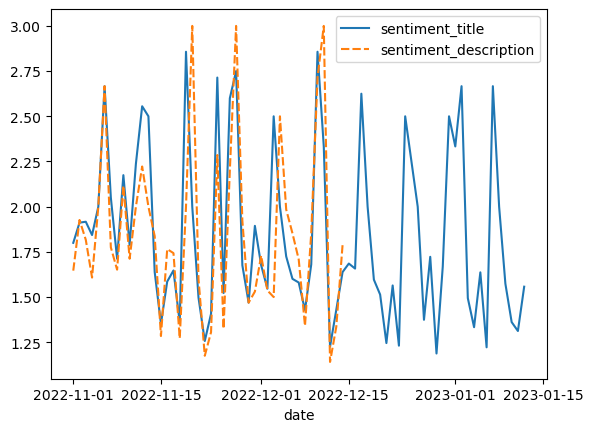

In [169]:
sns.lineplot(data=grouped_news)

In [176]:
index_price.tail(1)

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-11,3932.350098,3970.070068,3928.540039,3969.610107,4303360000


In [177]:
full_data=index_price.join(grouped_news, how="left")

In [178]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   49 non-null     float64
 1   High                   49 non-null     float64
 2   Low                    49 non-null     float64
 3   Close                  49 non-null     float64
 4   Volume                 49 non-null     int64  
 5   sentiment_title        49 non-null     float64
 6   sentiment_description  31 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.1 KB


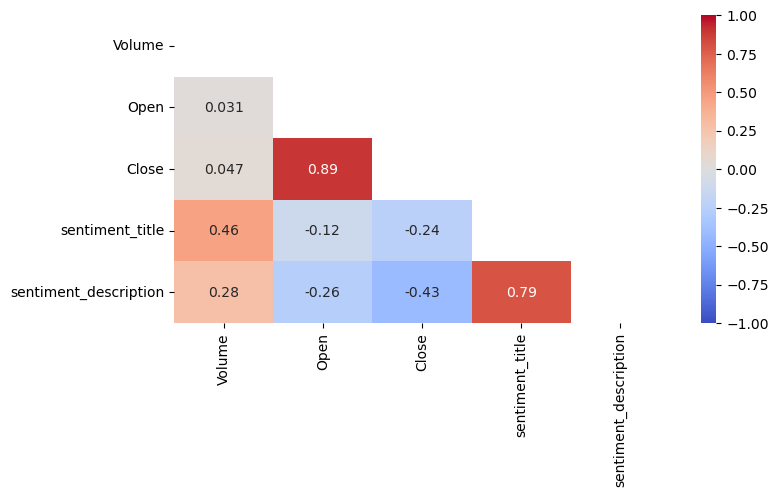

In [180]:
#Correlation matrix

fig,axs=plt.subplots(figsize=(8,4))

corr_data=full_data[["Volume","Open","Close","sentiment_title","sentiment_description"]]
# hour_df=hour[["yr","season","holiday","mnth","weekday","orkingday","weathersit","temp","atemp","hum","windspeed","weather_score","casual","registered"]]
matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()

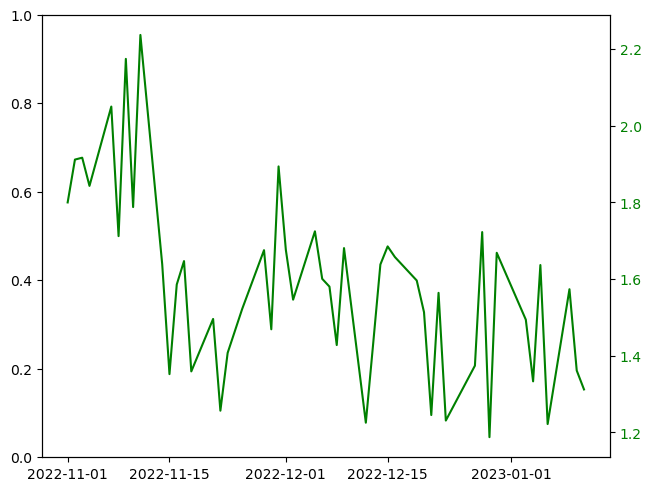

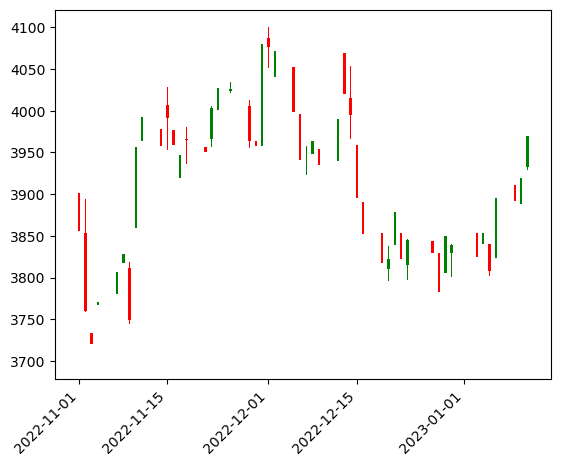

In [181]:

fig, ax = plt.subplots(constrained_layout=True)
plt.figure()
width=.4
width2=.05

up=full_data[full_data.Close>=full_data.Open]
down=full_data[full_data.Close<full_data.Open]

col1="green"
col2="red"

plt.bar(up.index,up.Close -up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High -up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low -up.Open,width2,bottom=up.Open,color=col1)


plt.bar(down.index,down.Close -down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High -down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low -down.Close,width2,bottom=down.Close,color=col2)

plt.xticks(rotation=45,ha="right")




ax2 = ax.twinx()


ax2.plot(full_data["sentiment_title"], color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.show()

                                                            Full data set 

In [182]:
df_news_prices=news.loc[:,["date","sentiment_title","sentiment_description"]].set_index("date").join(index_price)

In [183]:
df_news_prices.dropna(axis=0,inplace=True)

In [184]:
df_news_prices.tail(1)

,sentiment_title,sentiment_description,Open,High,Low,Close,Volume
2022-12-14,2,2.0,4015.540039,4053.76001,3965.649902,3995.320068,4.472340e+09


In [185]:
df_news_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9940 entries, 2022-11-01 to 2022-12-14
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiment_title        9940 non-null   int64  
 1   sentiment_description  9940 non-null   float64
 2   Open                   9940 non-null   float64
 3   High                   9940 non-null   float64
 4   Low                    9940 non-null   float64
 5   Close                  9940 non-null   float64
 6   Volume                 9940 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 621.2 KB


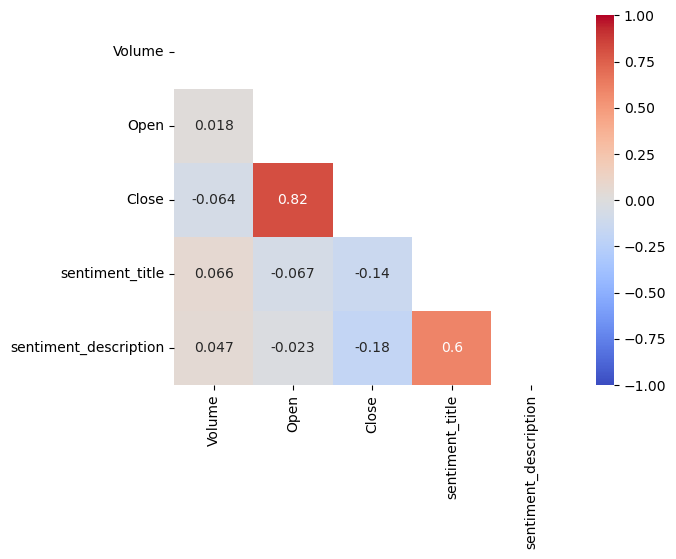

In [186]:
#Correlation matrix

fig,axs=plt.subplots()

corr_data=df_news_prices[["Volume","Open","Close","sentiment_title","sentiment_description"]]
# hour_df=hour[["yr","season","holiday","mnth","weekday","orkingday","weathersit","temp","atemp","hum","windspeed","weather_score","casual","registered"]]
matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()

                                                                                    Apllying Model (Kagle)

In [ ]:
#Keras Pretrained Models
model_kaggle = keras.models.load_model("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/KaggleModel.h5")

2023-02-09 16:13:11.803720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model_kaggle.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 20)            233680    
                                                                 
 lstm (LSTM)                 (None, 50)                14200     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 248,033
Trainable params: 248,033
Non-trainable params: 0
_________________________________________________________________


Encode 

In [ ]:
tokenizer=Tokenizer(num_words=None, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [ ]:
test_message=["Morgan Stanley stock falls Wednesday"]
test=tokenizer.texts_to_sequences(test_message)
print(test)

[[]]


In [ ]:
tokenizer

In [ ]:
test

[[]]